Descriptive statistics. Find a dataset online that has between 5 and 10 features per example.
Please use python for this question. Submit your code and the different figures in the pdf.
a. Plot the histogram of one of the features.
b. Plot the boxplots of all the features. Describe briefly how they compare to each other.
c. Compute the empirical correlation coefficients between every pair of features. This can be
done using the corrcoeff function in python.
d. Choose two features that are highly correlated (positively or negatively) and plot their
scatterplot.
e. Compute the two first principal components of the data and project onto them. Then
visualize the scatterplot of the result. Do the same for the two last principal components.

In [1]:
import pandas as pd
bikes = pd.read_csv('C:\\Users\\Caroline\\Documents\\School\\Intro to Data Science\\Term Project\\bikes_all_data.csv')

C:\Users\Caroline\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
column_ix_numeric = []
for column in bikes:
    if bikes.loc[:,column].dtype in ('int64', 'float64'):
        column_ix_numeric.append(column)

In [3]:
bikes.describe()

C:\Users\Caroline\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,is_installed,is_renting,is_returning,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,station_id,weather_ts,apparentTemperature,...,traffic_0_speed,traffic_0_travel_time,traffic_1_distance,traffic_1_linkId,traffic_1_speed,traffic_1_travel_time,traffic_2_distance,traffic_2_linkId,traffic_2_speed,traffic_2_travel_time
count,1.311519e+06,1.311519e+06,1.311519e+06,1.311519e+06,1.311519e+06,1.311519e+06,1.311519e+06,1.311519e+06,1.311519e+06,1.311519e+06,...,1.310986e+06,1.310986e+06,1.310986e+06,1.310986e+06,1.310986e+06,1.310986e+06,1.310986e+06,1.310986e+06,1.310986e+06,1.310986e+06
mean,9.999992e-01,9.990317e-01,9.990317e-01,1.599952e+01,8.717815e-01,1.847743e+01,4.463374e-02,1.459754e+03,1.477783e+09,5.691412e+01,...,2.652525e+01,4.946772e+02,9.005775e+02,4.571121e+06,2.607060e+01,5.567437e+02,1.239315e+03,4.556558e+06,2.474908e+01,4.896650e+02
std,8.731979e-04,3.110315e-02,3.110315e-02,1.294005e+01,1.277249e+00,1.331788e+01,6.372692e-01,1.371302e+03,6.322759e+05,1.070471e+01,...,1.499510e+01,7.895902e+02,6.060270e+02,8.693933e+04,1.450413e+01,1.310205e+03,7.509799e+02,9.535069e+04,1.392374e+01,9.821341e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.200000e+01,1.476724e+09,3.156000e+01,...,0.000000e+00,9.000000e+00,1.290784e+01,4.329472e+06,0.000000e+00,9.000000e+00,1.682873e+01,4.329472e+06,0.000000e+00,9.000000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,0.000000e+00,7.000000e+00,0.000000e+00,3.570000e+02,1.477245e+09,5.028000e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.000000e+00,1.000000e+00,1.000000e+00,1.300000e+01,0.000000e+00,1.700000e+01,0.000000e+00,4.930000e+02,1.477796e+09,5.634000e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000e+00,1.000000e+00,1.000000e+00,2.500000e+01,1.000000e+00,2.700000e+01,0.000000e+00,3.158000e+03,1.478310e+09,6.542000e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.000000e+00,1.000000e+00,1.000000e+00,6.700000e+01,5.500000e+01,6.700000e+01,5.600000e+01,3.438000e+03,1.478840e+09,8.462000e+01,...,1.864100e+02,2.071300e+04,6.283233e+03,4.620343e+06,1.864100e+02,2.071300e+04,6.878518e+03,4.620343e+06,1.864100e+02,2.071300e+04


In [6]:
numeric_features = ['apparentTemperature', 'humidity', 'temperature', 'windSpeed', 'visibility', 'weather_ts']
bikes_subset = bikes[bikes['station_id'] <= 72][numeric_features]
bikes_cleaned = bikes_subset.drop_duplicates(numeric_features,False)
bikes_cleaned = bikes_cleaned.drop('weather_ts', 1)
bikes_cleaned.describe()

,apparentTemperature,humidity,temperature,windSpeed,visibility
count,611.000000,611.000000,611.000000,611.000000,611.000000
mean,54.253241,0.668576,55.271178,6.522471,9.299116
std,10.299822,0.145453,9.145821,3.181296,1.405591
min,34.880000,0.350000,38.270000,0.070000,2.970000
25%,44.940000,0.560000,48.610000,4.215000,9.440000
50%,53.990000,0.660000,53.990000,6.160000,9.890000
75%,60.675000,0.780000,60.675000,8.310000,10.000000
max,83.410000,0.950000,82.660000,15.910000,10.000000


a. Plot the histogram of one of the features.

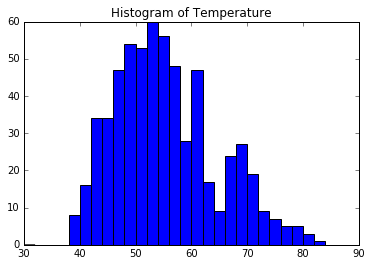

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
n, bins, patches = plt.hist(bikes_cleaned['temperature'], 30, (30,90))
plt.title("Histogram of Temperature")
plt.show()

b. Plot the boxplots of all the features.

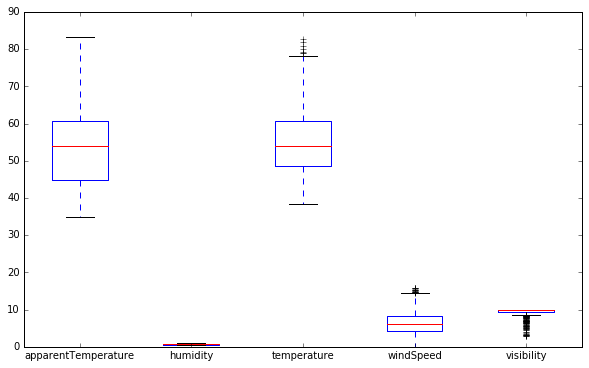

In [18]:
bikes_cleaned.plot.box(figsize = (10,6))

Dividing into two boxplots, because the columns with lower values are difficult to read when combined

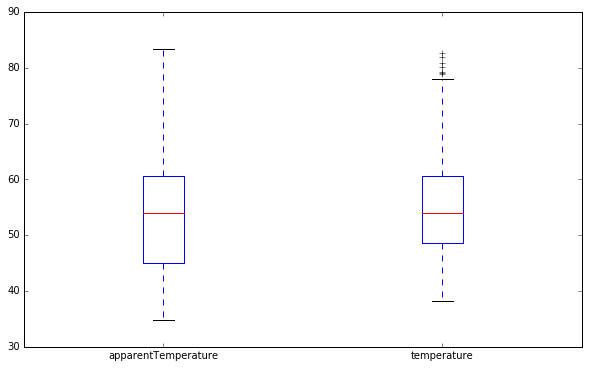

In [9]:
columns = [0, 2]
bikes_cleaned.iloc[:, columns].plot.box(figsize = (10,6))

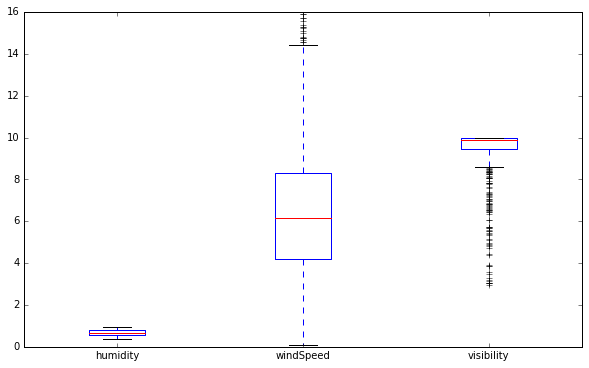

In [10]:
columns = [1,3,4]
bikes_cleaned.iloc[:, columns].plot.box(figsize = (10,6))

c. Compute the empirical correlation coefficients between every pair of features. This can be done using the corrcoeff function in python.

In [11]:
import numpy as np

correlations = {}

i = 0
for i in range(0,5):
        for k in range(i+1,5):
            i_col = bikes_subset.iloc[:,i]
            k_col = bikes_subset.iloc[:,k]
            correlations[i_col.name + ' and ' + k_col.name] = np.corrcoef(i_col, k_col)[1,0]
            
correlations

{'apparentTemperature and humidity': 0.14263726894492892,
 'apparentTemperature and temperature': 0.99256983354310802,
 'apparentTemperature and visibility': -0.14750608703344523,
 'apparentTemperature and windSpeed': -0.19209551752584889,
 'humidity and temperature': 0.15637665366404316,
 'humidity and visibility': -0.6616424061425844,
 'humidity and windSpeed': -0.1116976104880036,
 'temperature and visibility': -0.14724946649854861,
 'temperature and windSpeed': -0.14741869762652354,
 'windSpeed and visibility': 0.12801908006539192}

d. Choose two features that are highly correlated (positively or negatively) and plot their scatterplot.

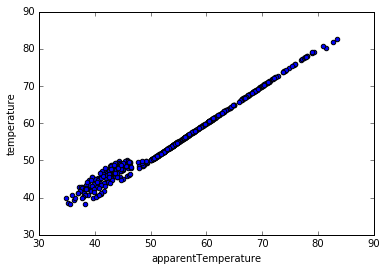

In [12]:
bikes_cleaned.plot.scatter(x = 'apparentTemperature', y='temperature')

Because these are almost perfectly correlated, I also plotted humidity and visibility as an example of two variables that are correlated, but not extremely so.

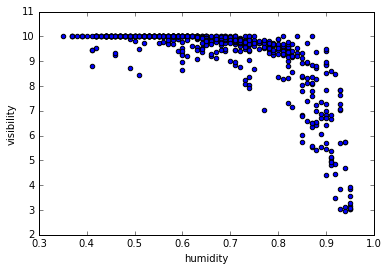

In [13]:
bikes_cleaned.plot.scatter(x = 'humidity', y='visibility')

e. Compute the two first principal components of the data and project onto them. Then visualize the scatterplot of the result. Do the same for the two last principal components.

In [59]:
covariance_matrix = np.cov(bikes_cleaned[features], rowvar = False)
eigenvalue, eigenvector = np.linalg.eig(covariance_matrix)
eigenvalue

array([  1.89278572e+02,   9.87007864e+00,   7.85670619e-01,
         1.90369920e+00,   1.18371391e-02])

In [56]:
#normalize all the eigenvectors

for i in range(0,5):
    eigenvector[:,i] = (eigenvector[:,i]/(np.linalg.norm(eigenvector[:,i], ord = 1))).round(4)
    
eigenvector

array([[-0.5067, -0.0345, -0.4237,  0.0071, -0.0061],
       [-0.001 , -0.0058,  0.0082,  0.0567, -0.9212],
       [-0.4491,  0.0987,  0.4721, -0.0238,  0.0072],
       [ 0.0326,  0.8063, -0.0744,  0.0613, -0.0036],
       [ 0.0106,  0.0547, -0.0215, -0.8511, -0.0619]])

First two components

In [22]:
#stack eigenvectors for 2 biggest eigenvalues
matrix_w = np.vstack((eigenvector[:,0], eigenvector[:,1]))
matrix_w

array([[-0.50668978, -0.00096432, -0.44914017,  0.03259737,  0.01060836],
       [-0.03447309, -0.00580634,  0.09871473,  0.80631771,  0.05468813]])

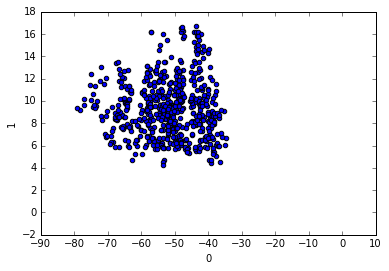

In [39]:
projected_onto_first = np.dot(matrix_w, bikes_cleaned[features].T)
projection_df_first = pd.DataFrame(projected_onto_first.T)
projection_df_first.plot.scatter(x = 0, y = 1, xticks = range(-90, 20, 10), yticks = range(-2,20,2))

Last two components

In [57]:
#stack eigenvectors for 2 smallest eigenvalues
matrix_q = np.vstack((eigenvector[:,4], eigenvector[:,2]))
matrix_q

array([[-0.0061, -0.9212,  0.0072, -0.0036, -0.0619],
       [-0.4237,  0.0082,  0.4721, -0.0744, -0.0215]])

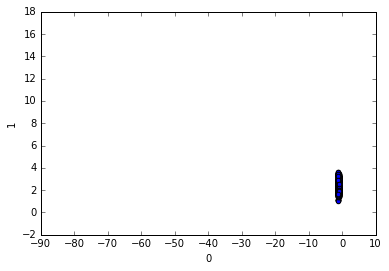

In [58]:
projected_onto_last = np.dot(matrix_q, bikes_cleaned.T)
projection_df_last = pd.DataFrame(projected_onto_last.T)
projection_df_last.plot.scatter(x = 0, y = 1, xticks = range(-90, 20, 10), yticks = range(-2,20,2))

Question 2, Part c

In [36]:
%matplotlib inline

import os.path
import math
import matplotlib.pyplot as plt
import numpy as np

weights = np.loadtxt("C:\\Users\\Caroline\\Documents\\School\\Statistical and Mathematical Methods\\weights.txt")

In [9]:
# True mean
mean_weight = np.mean(weights)

# Function to compute empirical variance from a empirical
def compute_empirical_variance(x):
    squared_differences = []
    for w in range(0, len(weights)-1):
        squared_differences.append((mean_weight - weights[w])**2)
    return sum(squared_differences)/(len(squared_differences) - 1)



198.441347791   112.9925   127.079421161   14.0869211608 198.441347791


In [30]:

def approximate_confidence_interval(x):
    lower = np.mean(x) - (np.std(x)/math.sqrt(len(x)))*1.96
    upper = np.mean(x) + (np.std(x)/math.sqrt(len(x)))*1.96
    interval = [lower, upper]
    return interval
        
type(approximate_confidence_interval(weights[random_ind]))

list

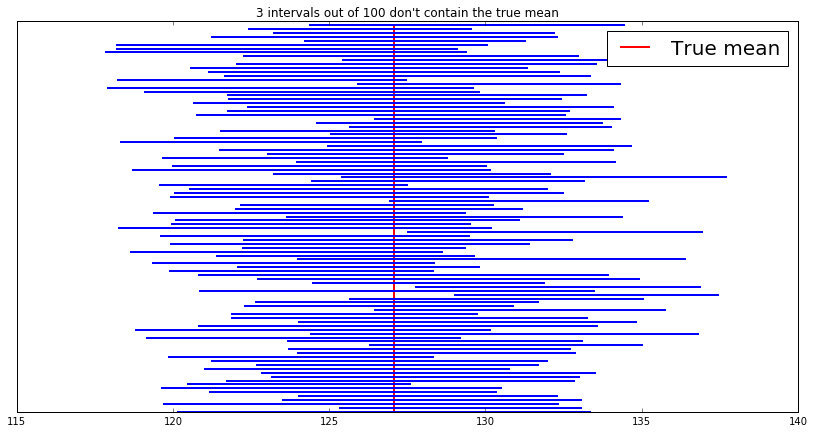

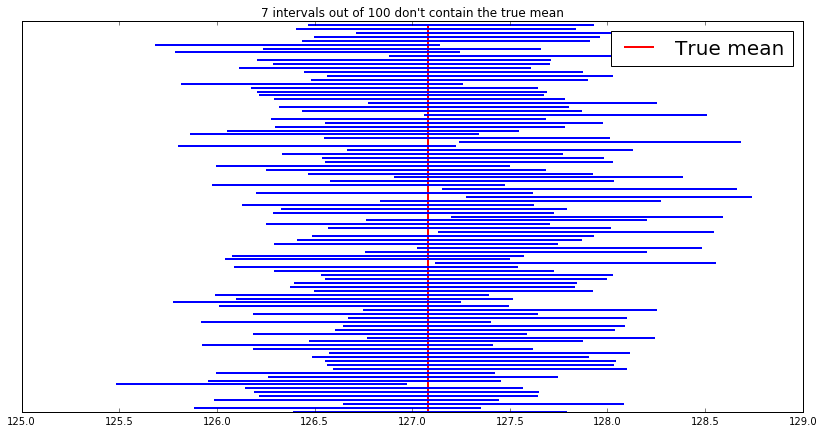

n = 20
710 intervals out of 10000 don't contain the true mean
n = 1000
500 intervals out of 10000 don't contain the true mean


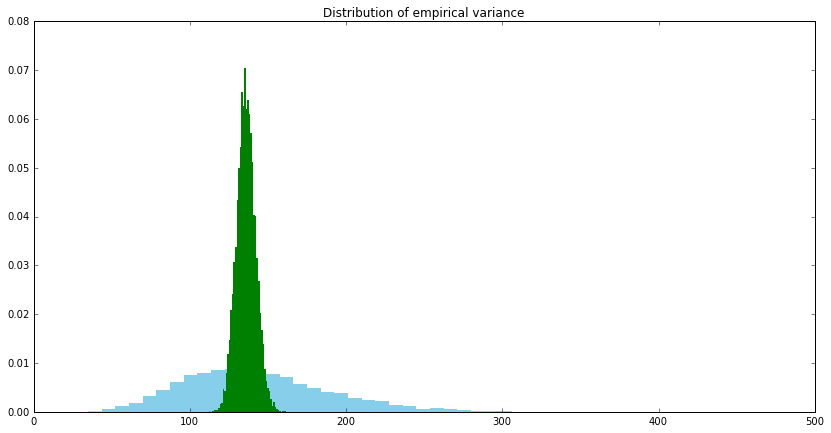

In [37]:
plt.close("all")

# Plot confidence intervals for different values of n
n_val = [20, 1000]
n_tries = 100
for n in n_val:
    conf_interval_list = []
    outside = 0
    for i in range(n_tries):
        # Uniform sampling with replacement
        random_ind = np.random.choice(weights.size, n, replace=True)
        conf_interval = approximate_confidence_interval(weights[random_ind])
        conf_interval_list.append(conf_interval)
        if conf_interval[0] > mean_weight or conf_interval[1] < mean_weight:
            outside += 1
    plt.figure(n, figsize=(14, 7))
    ax = plt.subplot(111)    
    ax.axes.get_yaxis().set_visible(False)    
    plt.plot(mean_weight, 0, color = 'red', lw=2, label='True mean') 
    plt.plot([mean_weight, mean_weight], [0, n_tries-1], color = 'red', lw=2) 
    for i in range(n_tries):
        plt.plot(conf_interval_list[i],[i, i] , color = 'blue', lw=2)
    plt.legend(fontsize=20)
    plt.title(str(outside) + " intervals out of 100 don't contain the true mean")
    plt.show()
    
n_tries = 10000
for n in n_val:
    outside = 0
    for i in range(n_tries):
        # Uniform sampling with replacement
        random_ind = np.random.choice(weights.size, n, replace=True)
        conf_interval = approximate_confidence_interval(weights[random_ind])
        if conf_interval[0] > mean_weight or conf_interval[1] < mean_weight:
            outside += 1
    print ("n = " + str(n))
    print (str(outside) + " intervals out of 10000 don't contain the true mean")
    
# Print distribution of empirical variance for n = 20 and n = 1000
empirical_var_list = []
for i_n in range(len(n_val)):
    n = n_val[i_n]
    empirical_var_list.append([])
    for i in range(n_tries):  
        random_ind = np.random.choice(weights.size, n, replace=True)
        empirical_var_list[i_n].append(compute_empirical_variance(weights[random_ind]))
plt.figure(n+1, figsize=(14, 7))
ax = plt.subplot(111)    
plt.title("Distribution of empirical variance")
plt.hist(empirical_var_list[0],50,normed=True,edgecolor = "none", color="skyblue", 
         label="n = 20")
plt.hist(empirical_var_list[1],50,normed=True,edgecolor = "none", color="green", 
         label="n = 1000")  
plt.show()